In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import Lasso

In [2]:
my_ratings = pd.read_excel('my-ratings.xlsx')
movies = pd.read_csv('movies.csv')
genres = pd.read_pickle('genres.p')

In [3]:
my_ratings

,userId,movieId,rating,timestamp
0,1000,97938,5.0,2020-02-21 14:34:00
1,1000,122882,5.0,2020-02-21 14:34:00
2,1000,141749,5.0,2020-02-21 14:34:00
3,1000,158783,5.0,2020-02-21 14:34:00
4,1000,166461,5.0,2020-02-21 14:34:00
5,1002,187541,4.0,2020-02-23 18:53:00
6,1002,177765,4.0,2020-02-23 18:56:00
7,1002,179133,5.0,2020-02-23 18:57:00
8,1002,142488,3.5,2020-02-23 19:03:00
9,1002,106920,4.0,2020-02-23 19:05:00


In [4]:
# 유저별 데이터 개수
my_ratings['userId'].value_counts()

1001    95
1002    12
1000     5
Name: userId, dtype: int64

In [5]:
movies.sample()

,movieId,title,genres
8895,134783,Entourage (2015),Comedy


In [6]:
genres.sample()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1833,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [7]:
# 유저 평점 데이터 + 영화 제목 + 영화 아이템 프로필(장르 바이너리)
my_ratings = my_ratings.merge(movies, on='movieId').merge(genres, left_on='movieId', right_index=True)

In [8]:
print(my_ratings.shape)
my_ratings.sample()

(112, 26)


,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
64,1001,128360,2.0,2020-04-30 12:00:00,The Hateful Eight (2015),Western,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
# 내 데이터 테이블 (1001번)
user1001 = my_ratings[my_ratings['userId']==1001]

In [10]:
user1001.shape

(95, 26)

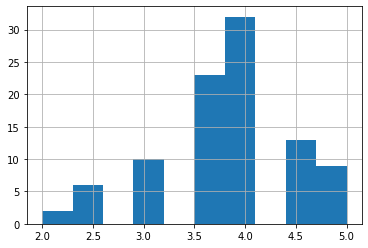

In [11]:
user1001['rating'].hist()
# 평점이 연속형 변수가 아니라서 히스토그램이 이렇게 사이사이 비어있는 것처럼 보임. 실제로는 2.0~5.0 고르게 있음.

In [12]:
user1001['rating'].value_counts()

4.0    32
3.5    23
4.5    13
3.0    10
5.0     9
2.5     6
2.0     2
Name: rating, dtype: int64

In [13]:
user1001['rating'].describe()

count    95.000000
mean      3.800000
std       0.697259
min       2.000000
25%       3.500000
50%       4.000000
75%       4.000000
max       5.000000
Name: rating, dtype: float64

In [14]:
# 내가 최고점(5점) 준 영화
user1001[user1001['rating']==5.0]

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2,1001,97938,5.0,2020-04-30 12:00:00,Life of Pi (2012),Adventure|Drama|IMAX,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1001,122882,5.0,2020-04-30 12:00:00,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0
60,1001,156605,5.0,2020-03-12 15:00:00,Paterson,(no genres listed),1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,1001,164179,5.0,2020-03-12 15:00:00,Arrival (2016),Sci-Fi,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
62,1001,166568,5.0,2020-03-12 15:00:00,Miss Sloane (2016),Thriller,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
63,1001,177615,5.0,2020-03-12 15:00:00,Lady Bird (2017),Comedy,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109,1001,112556,5.0,2020-04-30 12:00:00,Gone Girl (2014),Drama|Thriller,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
110,1001,134368,5.0,2020-04-30 12:00:00,Spy (2015),Action|Comedy|Crime,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
111,1001,160080,5.0,2020-04-30 12:00:00,Ghostbusters (2016),Action|Comedy|Horror|Sci-Fi,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [15]:
# 내가 최저점(2점) 준 영화
user1001[user1001['rating']==2.0]

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
64,1001,128360,2.0,2020-04-30 12:00:00,The Hateful Eight (2015),Western,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
65,1001,136864,2.0,2020-04-30 12:00:00,Batman v Superman: Dawn of Justice (2016),Action|Adventure|Fantasy|Sci-Fi,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
# 내가 많이 본 장르

In [17]:
genre_cols = genres.columns

In [18]:
user1001[genre_cols].sum().sort_values(ascending=False)

Drama                 40
Comedy                32
Adventure             31
Action                29
Sci-Fi                23
Thriller              18
Fantasy               17
Romance               12
Animation             10
Children               9
Crime                  6
IMAX                   6
Mystery                3
Western                2
Horror                 2
Documentary            1
Musical                1
(no genres listed)     1
War                    0
Film-Noir              0
dtype: int64

In [19]:
# 세 명 모두 평점을 준 영화는?
my_ratings['movieId'].value_counts().sort_values(ascending=False)

97938     3
142488    2
166461    2
141749    2
106920    2
158783    2
177765    2
134853    2
122882    2
111659    1
140110    1
122900    1
122926    1
79132     1
4896      1
162082    1
112421    1
99114     1
91500     1
122924    1
102445    1
86833     1
101962    1
159858    1
171763    1
122904    1
4886      1
163134    1
160080    1
179819    1
         ..
143859    1
148626    1
140956    1
136864    1
156605    1
63992     1
88810     1
171765    1
143355    1
97913     1
51834     1
106696    1
109487    1
103372    1
177615    1
166568    1
112852    1
109374    1
95449     1
135133    1
134368    1
103141    1
506       1
1258      1
141422    1
122906    1
94959     1
134130    1
166643    1
151317    1
Name: movieId, Length: 102, dtype: int64

In [20]:
# 파이이야기 평점 비교
my_ratings[my_ratings['movieId']==97938]

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1000,97938,5.0,2020-02-21 14:34:00,Life of Pi (2012),Adventure|Drama|IMAX,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1002,97938,2.5,2020-02-23 19:09:00,Life of Pi (2012),Adventure|Drama|IMAX,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,1001,97938,5.0,2020-04-30 12:00:00,Life of Pi (2012),Adventure|Drama|IMAX,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [21]:
# 세 명의 평점 평균
# 1002번은 셋 중에서 가장 짜게 점수를 주는 편이긴 한데, 파이이야기는 그보다도 훨씬 낮게 줬다.
my_ratings.groupby('userId')['rating'].mean()

userId
1000    5.000000
1001    3.800000
1002    3.458333
Name: rating, dtype: float64

In [22]:
# 유저별, 장르별 평점 평균 (v1 유저 프로필 만들기 복습. 예측은 안 할 건데 그냥 EDA 하려고 해 봤음. 빼도 됨.)

my_ratings_v1 = my_ratings.copy().replace(0, np.nan)

for col in genre_cols:
    my_ratings_v1[col] = my_ratings_v1[col] * my_ratings_v1['rating']

user_profile_v1 = my_ratings_v1.groupby('userId')[genre_cols].mean()

In [23]:
user_profile_v1

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,,
1000,NaN,5.000000,5.000000,5.0,5.000000,5.000000,NaN,NaN,5.000000,5.000000,NaN,NaN,5.00,NaN,NaN,5.000000,5.000000,5.000000,NaN,NaN
1001,5.0,3.741379,3.887097,4.1,4.222222,3.828125,3.666667,4.0,3.787500,3.617647,NaN,4.50,4.25,4.0,3.833333,3.333333,3.847826,3.777778,NaN,2.5
1002,NaN,3.000000,3.875000,4.5,4.333333,4.250000,5.000000,NaN,3.666667,4.750000,NaN,1.75,2.50,NaN,NaN,3.750000,4.000000,2.750000,NaN,NaN


In [24]:
user_profile_v1.describe()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1.0,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.0,3.000000,3.000000,0.0,2.000000,3.000000,1.0,1.000000,3.000000,3.000000,3.000000,0.0,1.0
mean,5.0,3.913793,4.254032,4.533333,4.518519,4.359375,4.333333,4.0,4.151389,4.455882,NaN,3.125000,3.916667,4.0,3.833333,4.027778,4.282609,3.842593,NaN,2.5
std,NaN,1.011086,0.646055,0.450925,0.420660,0.593544,0.942809,NaN,0.737398,0.736616,NaN,1.944544,1.282900,NaN,NaN,0.867361,0.625921,1.126399,NaN,NaN
min,5.0,3.000000,3.875000,4.100000,4.222222,3.828125,3.666667,4.0,3.666667,3.617647,NaN,1.750000,2.500000,4.0,3.833333,3.333333,3.847826,2.750000,NaN,2.5
25%,5.0,3.370690,3.881048,4.300000,4.277778,4.039062,4.000000,4.0,3.727083,4.183824,NaN,2.437500,3.375000,4.0,3.833333,3.541667,3.923913,3.263889,NaN,2.5
50%,5.0,3.741379,3.887097,4.500000,4.333333,4.250000,4.333333,4.0,3.787500,4.750000,NaN,3.125000,4.250000,4.0,3.833333,3.750000,4.000000,3.777778,NaN,2.5
75%,5.0,4.370690,4.443548,4.750000,4.666667,4.625000,4.666667,4.0,4.393750,4.875000,NaN,3.812500,4.625000,4.0,3.833333,4.375000,4.500000,4.388889,NaN,2.5
max,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.0,5.000000,5.000000,NaN,4.500000,5.000000,4.0,3.833333,5.000000,5.000000,5.000000,NaN,2.5


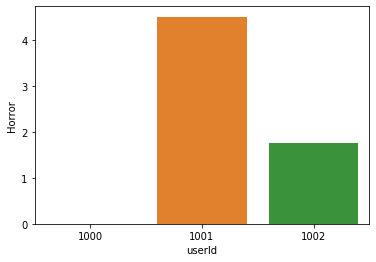

In [25]:
# 세 명의 편차가 가장 큰 호러 장르 평균 비교
# 한 그래프 내에서 모든 장르를 유저별로 비교하는 걸 그리고 싶었는데 어떻게 하는지 잘 모르겠음.. SOS
sns.barplot(x=user_profile_v1.index, y='Horror', data=user_profile_v1)

In [26]:
# 나 호러 잘 안 보는데 왜케 높은 거임ㅋㅋㅋㅋㅋㅋ 뭘 봤는지 보자
user1001[user1001['Horror']==1]

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
87,1001,1258,4.0,2020-04-30 12:00:00,"Shining, The (1980)",Horror,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
111,1001,160080,5.0,2020-04-30 12:00:00,Ghostbusters (2016),Action|Comedy|Horror|Sci-Fi,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [27]:
# 호러 장르 포함된 영화 두 개 밖에 없는데 둘 다 높은 점수를 줘서 평균도 높게 나왔다. 
# 근데 고스트버스터즈에 호러가 있다니 놀랍네..
user_profile_v1.loc[1001].sort_values(ascending=False)

(no genres listed)    5.000000
Horror                4.500000
IMAX                  4.250000
Children              4.222222
Animation             4.100000
Musical               4.000000
Documentary           4.000000
Adventure             3.887097
Sci-Fi                3.847826
Mystery               3.833333
Comedy                3.828125
Drama                 3.787500
Thriller              3.777778
Action                3.741379
Crime                 3.666667
Fantasy               3.617647
Romance               3.333333
Western               2.500000
Film-Noir                  NaN
War                        NaN
Name: 1001, dtype: float64

In [28]:
# 노장르로 되어있는 패터슨 하나에 5.0을 줘서 노장르 평균이 제일 높음
user1001[user1001['(no genres listed)']==1]

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
60,1001,156605,5.0,2020-03-12 15:00:00,Paterson,(no genres listed),1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# 나의 유저 프로필을 Lasso 모델로 만들기 & 하이퍼파라미터 튜닝 

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_rand

In [44]:
param_grid = {'alpha': sp_rand()}

model = Lasso()
rsearch = RandomizedSearchCV(estimator=model, 
                             param_distributions=param_grid, 
                             n_iter=100,
                             cv=10,
                             random_state=42)

rsearch.fit(user1001[genre_cols], user1001['rating'])

/Users/jaemin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='warn', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a271c9dd8>},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [45]:
# 라쏘 알파값
rsearch.best_estimator_.alpha

0.005522117123602399

알파값 범위를 0~1로 지정했는데 (sp.rand 디폴트) 0.005로 0에 훨씬 가까운 수가 나왔다. 범위를 더 좁혀서 더욱 최적인 알파값을 찾아본다.

In [47]:
param_grid = {'alpha': sp_rand(0, 0.1)}

model = Lasso()
rsearch = RandomizedSearchCV(estimator=model, 
                             param_distributions=param_grid, 
                             n_iter=100,
                             cv=10,
                             random_state=42)

rsearch.fit(user1001[genre_cols], user1001['rating'])

/Users/jaemin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='warn', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a27236908>},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [48]:
rsearch.best_estimator_.alpha

0.011586905952512973

n_iter, cv를 두 배로 늘려본다.

In [51]:
param_grid = {'alpha': sp_rand(0, 0.1)}

model = Lasso()
rsearch = RandomizedSearchCV(estimator=model, 
                             param_distributions=param_grid, 
                             n_iter=200,
                             cv=20,
                             random_state=42)

rsearch.fit(user1001[genre_cols], user1001['rating'])

/Users/jaemin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=20, error_score='raise-deprecating',
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a2722d390>},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [52]:
rsearch.best_estimator_.alpha
# n_iter=100, cv=10 일 때랑 n_iter=200, cv=20일 때랑 크게 차이 없이 0.01 정도

0.011005192452767676

In [54]:
# 내 유저 프로필 절편
rsearch.best_estimator_.intercept_

3.8373301031511775

In [55]:
# 내 유저 프로필 계수
rsearch.best_estimator_.coef_

array([ 0.11719154, -0.06997986,  0.        ,  0.21040761,  0.17259739,
       -0.00707896, -0.        ,  0.        ,  0.05279333, -0.13181245,
        0.        ,  0.17768058,  0.2596483 ,  0.        , -0.        ,
       -0.43936391,  0.00152669, -0.        ,  0.        , -0.80599019])

In [70]:
user1001_profile = pd.DataFrame([rsearch.best_estimator_.intercept_, *rsearch.best_estimator_.coef_], index=['intercept', *genre_cols], columns=['score'])
user1001_profile

,score
intercept,3.837330
(no genres listed),0.117192
Action,-0.069980
Adventure,0.000000
Animation,0.210408
Children,0.172597
Comedy,-0.007079
Crime,-0.000000
Documentary,0.000000
Drama,0.052793


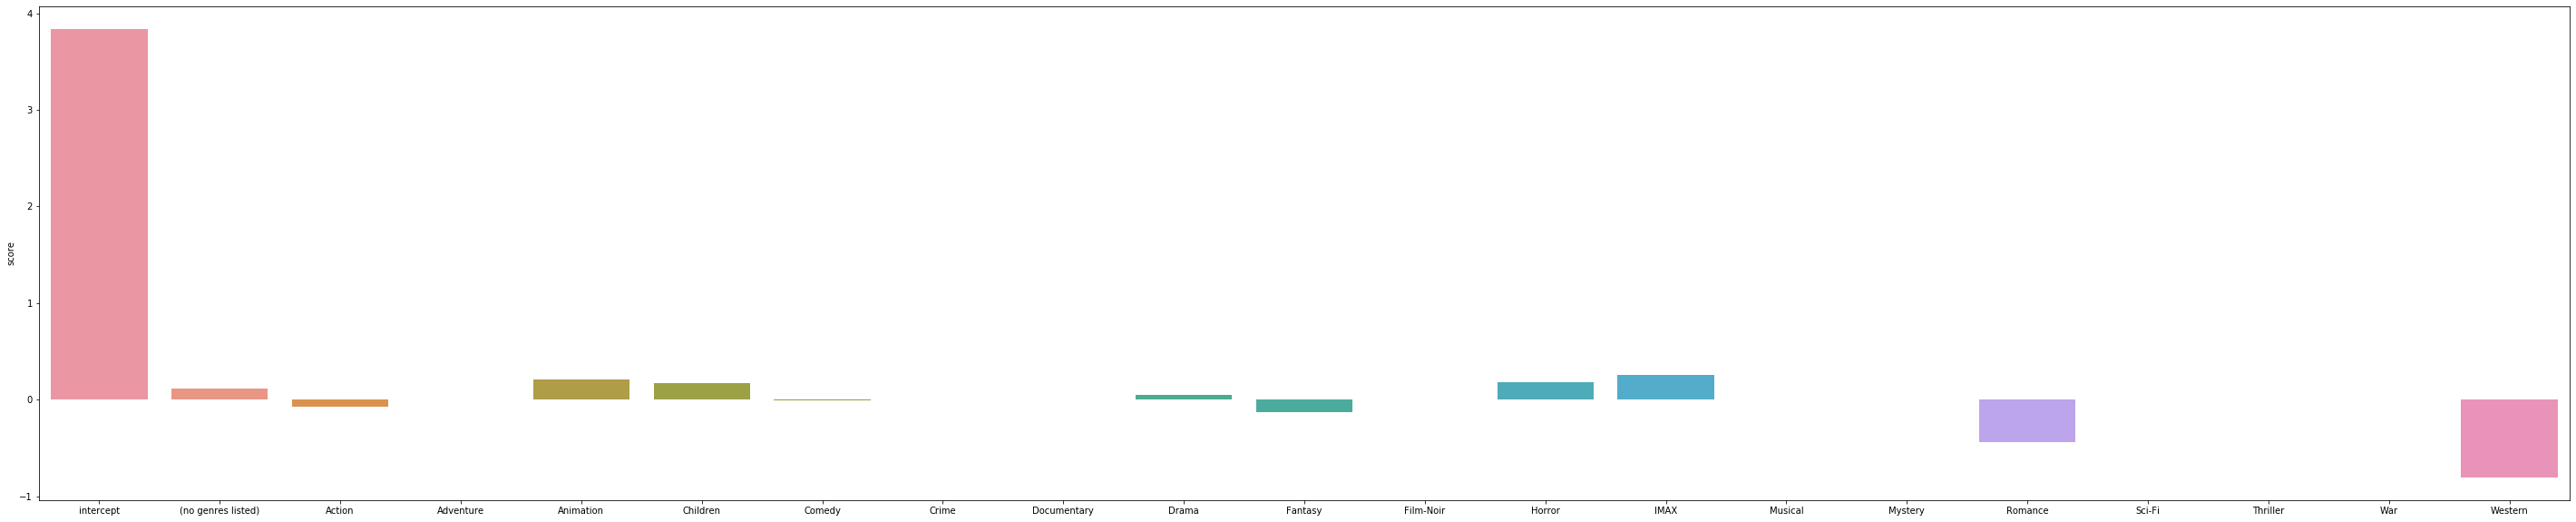

In [74]:
plt.figure(figsize=(50,10))
sns.barplot(x=user1001_profile.index, y='score', data=user1001_profile)

계수 해석  
* Lasso는 피쳐 선택의 역할도 해 줌. 내 데이터의 경우 Adventure, Crime, Documentary, Film-Noir, Musical, Mystery, Sci-Fi, Thriller, War 총 9개의 장르 피쳐의 중요도가 낮다고 판단해 계수를 0으로 수렴시킴.  
* 이 중에는 데이터가 없거나 부족해서 그런 것도 있지만, Adventure나 Sci-Fi 처럼 데이터가 많은 데도 피쳐에서 탈락된 것도 있음. 이런 경우에는, 해당 장르들보다 다른 요소(가령 우리 데이터에서는 알 수 없는 배우나 감독이라던가, 아니면 계수가 큰 다른 장르)가 나의 평점에 영향을 미친다고 해석할 수 있음. 이렇게 다른 피쳐를 찾아내는 것도 데이터 분석가가 해야 할 일.

In [76]:
# 장르별 평점 개수 다시 보기
user1001[genre_cols].sum().sort_values(ascending=False)

Drama                 40
Comedy                32
Adventure             31
Action                29
Sci-Fi                23
Thriller              18
Fantasy               17
Romance               12
Animation             10
Children               9
Crime                  6
IMAX                   6
Mystery                3
Western                2
Horror                 2
Documentary            1
Musical                1
(no genres listed)     1
War                    0
Film-Noir              0
dtype: int64

In [79]:
# predict 함수로 예측 
predict_1 = rsearch.predict(genres)

In [80]:
predict_1

array([4.08144369, 3.87811504, 3.39088723, ..., 3.89012343, 3.97775785,
       3.83025114])

In [87]:
# predict 함수 안 쓰고 계수 + 장르 점수 계산해서 예측 

predict_2 = []
intercept = user1001_profile.loc['intercept', 'score']

for idx, row in genres.iterrows():
    genre_score = sum(user1001_profile.loc[genre_cols, 'score'] * row[genre_cols])
    expected_score = intercept + genre_score
    predict_2.append(expected_score)

In [91]:
predict_2[:3]

[4.081443686475921, 3.8781150434320577, 3.39088723319452]

In [93]:
predict_2[-3:]
# 두 가지 방법의 예측값이 똑같이 나오는 것 확인함. 둘 중 어떤 걸로 해도 무관.

[3.8901234283802393, 3.97775785043742, 3.830251140264762]

In [94]:
genres['user1001_prediction'] = predict_2

In [97]:
genres.sample()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user1001_prediction
movieId,,,,,,,,,,,,,,,,,,,,,
8947,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,4.015011


In [99]:
# 이미 평점을 준 영화는 리스트에서 제외하고 예측 평점 높은 순으로 정렬
reco_items = genres[~genres.index.isin(user1001['movieId'])].sort_values('user1001_prediction', ascending=False)

In [103]:
# 테이블에 영화 제목 조인
reco_items = reco_items.merge(movies[['movieId', 'title']], on='movieId')

In [104]:
# 예상평점 상위 20개를 추천
reco_items.head(20)

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user1001_prediction,title
0,364,0,0,1,1,1,0,0,0,1,...,1,1,0,0,0,0,0,0,4.532777,"Lion King, The (1994)"
1,5882,0,0,1,1,1,0,0,0,0,...,1,0,0,0,1,0,0,0,4.481510,Treasure Planet (2002)
2,3159,0,0,0,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,4.479983,Fantasia 2000 (1999)
3,97172,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,4.477988,Frankenweenie (2012)
4,87876,0,0,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,4.472904,Cars 2 (2011)
5,103335,0,0,0,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,4.472904,Despicable Me 2 (2013)
6,95105,0,0,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,4.472904,Madagascar 3: Europe's Most Wanted (2012)
7,91386,0,0,0,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,4.472904,Happy Feet Two (2011)
8,49274,0,0,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,4.472904,Happy Feet (2006)
9,48414,0,0,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,4.472904,Open Season (2006)


내 유저 프로필에서 Animation 계수 0.210408, Children 계수 0.172597로 둘 다 높기 때문에 라이언킹, 프랑켄위니 등 어린이 대상 애니메이션 영화들이 주로 추천되었다.  
내가 원하는 장르를 제한해서 추천을 받아볼 수도 있다.

In [105]:
# 코미디 장르이면서 애니메이션이 아닌 영화 20개를 추천해 줘
reco_items[(reco_items['Comedy']==1) & (reco_items['Animation']==0)].head(20)

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user1001_prediction,title
41,94478,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,4.267580,Dark Shadows (2012)
236,95307,0,0,0,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,4.142693,Rock of Ages (2012)
243,30793,0,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,4.130684,Charlie and the Chocolate Factory (2005)
506,51709,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,1,0,0,4.062252,"Host, The (Gwoemul) (2006)"
507,69720,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,4.060725,Hood of Horror (2006)
508,149011,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,4.060725,He Never Died (2015)
509,132153,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,4.060725,Buzzard (2015)
510,5909,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,4.060725,Visitor Q (Bizita Q) (2001)
511,30745,0,0,0,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,4.060725,Gozu (Gokudô kyôfu dai-gekijô: Gozu) (2003)
512,114670,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,4.060725,Tusk (2014)


In [110]:
# 평소 보고 싶었던 영화의 예상 평점을 찾아보기
# 예시) 해리포터 시리즈 본 지 오래 돼서 다시 볼까 하는데, 내 평점 얼마나 나올까?
reco_items[reco_items['title'].str.contains('Harry Potter')][['user1001_prediction', 'title']]

,user1001_prediction,title
698,4.017959,Harry Potter and the Order of the Phoenix (2007)
1544,3.965166,Harry Potter and the Prisoner of Azkaban (2004)
1546,3.965166,Harry Potter and the Goblet of Fire (2005)
1584,3.947979,Harry Potter and the Deathly Hallows: Part 2 (...
1768,3.895186,Harry Potter and the Deathly Hallows: Part 1 (...
7748,3.705518,Harry Potter and the Chamber of Secrets (2002)
7993,3.525802,Harry Potter and the Half-Blood Prince (2009)
